## Iris Flower Classification
**The Iris flower dataset consists of three species: setosa, versicolor,
and virginica. These species can be distinguished based on their
measurements. Now, imagine that you have the measurements
of Iris flowers categorized by their respective species. Your
objective is to train a machine learning model that can learn from
these measurements and accurately classify the Iris flowers into
their respective species.**

**Use the Iris dataset to develop a model that can classify iris
flowers into different species based on their sepal and petal
measurements. This dataset is widely used for introductory
classification tasks**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])
import seaborn as sns

In [2]:
iris=pd.read_csv('IRIS.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.shape

(150, 5)

In [6]:
iris['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Data Preprocessing

In [7]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

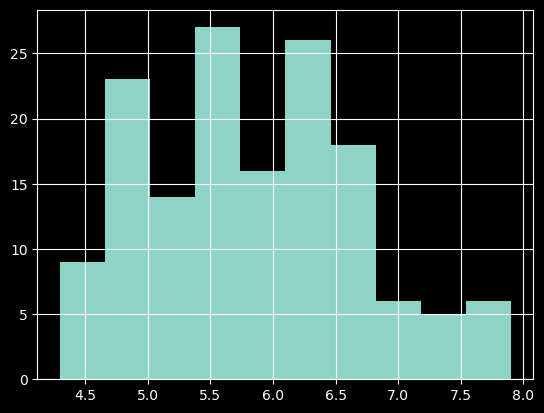

In [8]:
iris['sepal_length'].hist()

<Axes: >

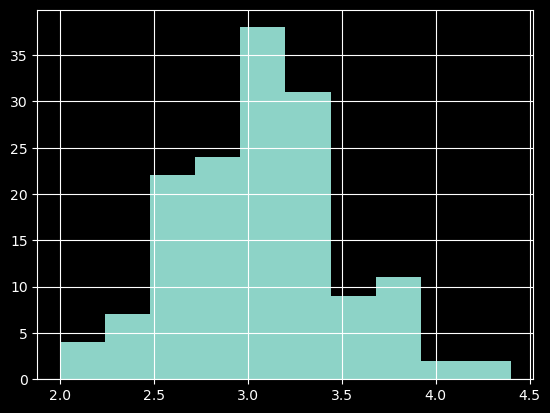

In [9]:
iris['sepal_width'].hist()

sepal width and sepal length cannot be used as a parameter to divide the three groups as clearly seen in the above two graphs

<Axes: >

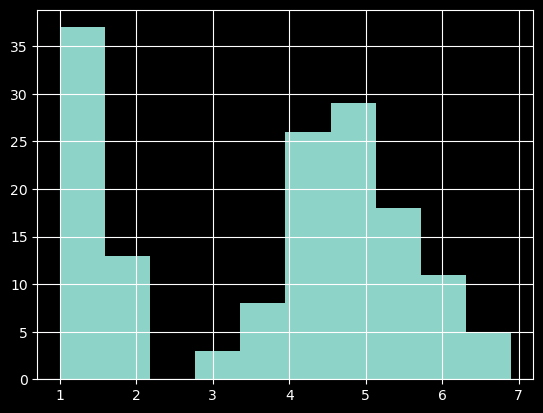

In [10]:
iris['petal_length'].hist()

this graph shows that petal length can clearly distinguish two groups

<Axes: >

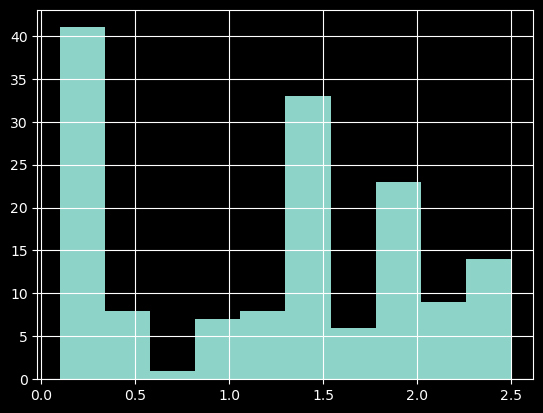

In [11]:
iris['petal_width'].hist()

it categorizes into two groups 

In [12]:
colors=['red','blue','yellow']
species=['Iris-setosa','Iris-versicolor','Iris-virginica']


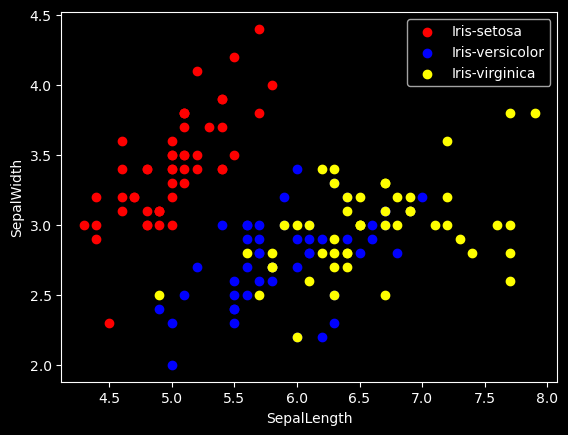

In [13]:
for i in range(3):
    x=iris[iris['species']==species[i]]
    plt.scatter(x['sepal_length'],x['sepal_width'],c=colors[i],label=species[i])
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.legend()

here the distrubution of the three groups is not proper

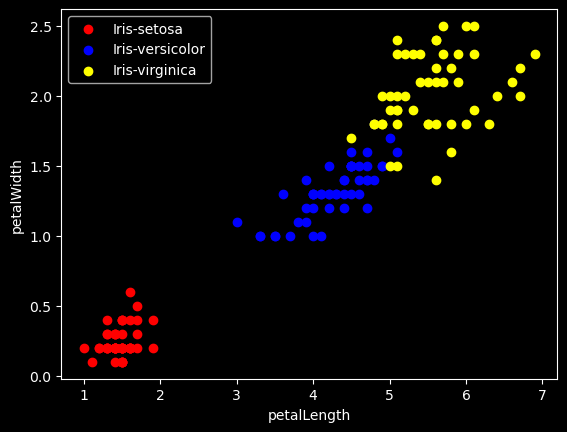

In [14]:
for i in range(3):
    x=iris[iris['species']==species[i]]
    plt.scatter(x['petal_length'],x['petal_width'],c=colors[i],label=species[i])
plt.xlabel('petalLength')
plt.ylabel('petalWidth')
plt.legend()

Here we can clearly distinguish the three groups

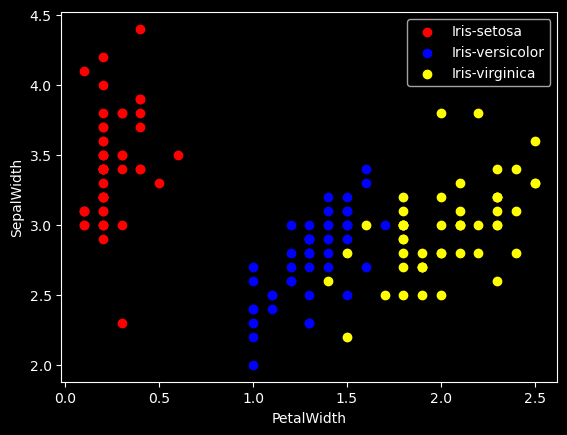

In [16]:
for i in range(3):
    x=iris[iris['species']==species[i]]
    plt.scatter(x['petal_width'],x['sepal_width'],c=colors[i],label=species[i])
plt.xlabel('PetalWidth')
plt.ylabel('SepalWidth')
plt.legend()

groups are quite distinct in this parameter

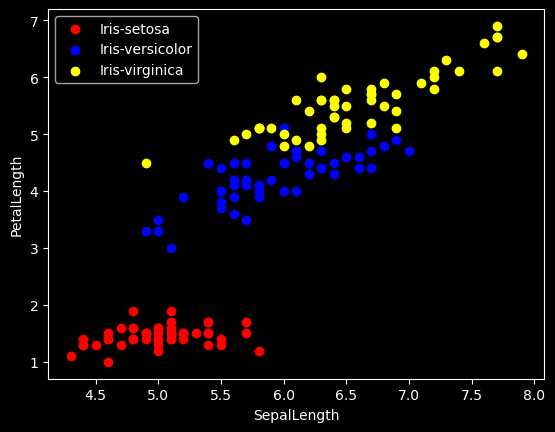

In [15]:
for i in range(3):
    x=iris[iris['species']==species[i]]
    plt.scatter(x['sepal_length'],x['petal_length'],c=colors[i],label=species[i])
plt.xlabel('SepalLength')
plt.ylabel('PetalLength')
plt.legend()

petal length and sepal length also categorizes properly

<Axes: >

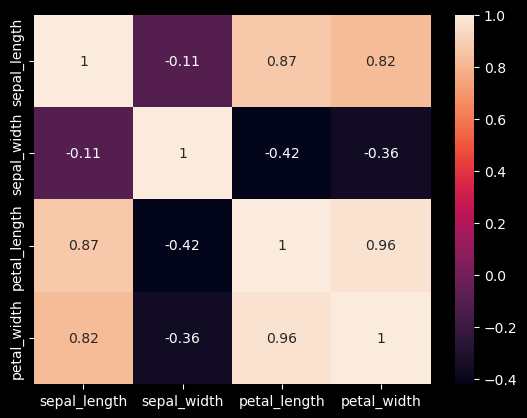

In [17]:
x=iris.drop('species',axis=1)
x.corr()
sns.heatmap(x.corr(),annot=True)

petal length and petal width has the highest correlation

### Label Encoder

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [20]:
iris['species']=le.fit_transform(iris['species'])
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [22]:
from sklearn.model_selection import train_test_split
x=iris.drop(columns=['species'])
y=iris['species']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)


In [23]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [24]:
model.fit(x_train,y_train)

LogisticRegression()

In [29]:
print(f'Accuracy: {model.score(x_test,y_test)*100} %')

Accuracy: 100.0 %
